# Exploratory Data Analysis Using Python

Author:Na Qian

data source: https://docs.google.com/spreadsheets/d/e/2PACX-1vQYTO5zWulYhXzhNR-v2B5-THd_-on3SUr5H8GuytVozET8HZvc81epvD4C0ysy6UwajQaljjhXlMqW/pub?gid=1528232892&single=true&output=csv

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = (23, 8)
sns.set_style('whitegrid')

In [3]:
#read the data
df=pd.read_csv('Hawaii_listings_data.csv')

In [4]:
df.head()

,id,name,host_id,host_name,host_is_superhost,host_has_profile_pic,neighbourhood_group,neighbourhood,latitude,longitude,...,price,beds,minimum_nights,review_scores_rating,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,cancellation_policy
0,5065,MAUKA BB,7257,Wayne,f,t,Hawaii,Hamakua,20.04095,-155.43251,...,85,1.0,2,92.0,41,3/9/20,0.48,2,359,moderate
1,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,f,t,Hawaii,South Kohala,20.02740,-155.70200,...,110,1.0,2,87.0,10,3/1/20,0.09,4,279,strict_14_with_grace_period
2,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,t,t,Hawaii,South Kona,19.43119,-155.88079,...,92,1.0,5,93.0,167,2/21/20,1.36,3,331,strict_14_with_grace_period
3,5389,Keauhou Villa,7878,Edward,t,t,Hawaii,North Kona,19.56413,-155.96347,...,299,4.0,6,99.0,19,1/28/20,0.25,3,232,flexible
4,5390,STAY AT PRINCE KUHIO!,7887,Todd,f,t,Kauai,Koloa-Poipu,21.88305,-159.47372,...,92,1.0,3,88.0,137,2/25/20,1.04,1,73,strict_14_with_grace_period


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              24521 non-null  int64  
 1   name                            24521 non-null  object 
 2   host_id                         24521 non-null  int64  
 3   host_name                       24521 non-null  object 
 4   host_is_superhost               24521 non-null  object 
 5   host_has_profile_pic            24521 non-null  object 
 6   neighbourhood_group             24521 non-null  object 
 7   neighbourhood                   24521 non-null  object 
 8   latitude                        24521 non-null  float64
 9   longitude                       24521 non-null  float64
 10  room_type                       24521 non-null  object 
 11  price                           24521 non-null  int64  
 12  beds                            

# This data set includes 21 columns and 24521 rows. There is no non-value. The columns are:
1. id: the id of the record
2. name: the name of the host
3. host_id: the id of the host
4. host_name: host's name
5. host_is_superhost: t represents host is a super host, f represents host is not a super host
6. host_has_profile_pic: t represents host has a profile picture, f represents host does not have a profile picture
7. neighbourhood_group: Maui, Honolulu, Hawaii, Kauai
8. neighborhood: Primary Urban Center, Kihei-Makena etc
9. latitude: the latitude of the room
10. longitude: the longitude of the room
11. room_type: Entire home/apt, Private room, Hotel room, Shared room 
12. price: the price of the room
13. beds: the number of beds in the room
14. minimum_nights: the minimum stay nights, eg:2
15. review_scores_rating: The rating score
16. number_of_reviews: the number of reviews
17. last_review: the date of the last review
18. reviews_per_month: number of review per month
19. calculated_host_listings_count: the host's total listing in the market
20. availability_365: the availability of the room in 365 days
21. cancellation_policy : strict_14_with_grace_period, flexible etc


In [6]:
#Trim the outliers
starting_percentile = df['price'].quantile(.01)
ending_percentile = df['price'].quantile(.99)
df_trimmed = df.loc[((df['price'] > starting_percentile) & (df['price'] < ending_percentile))]

# Explore the distribution of room price

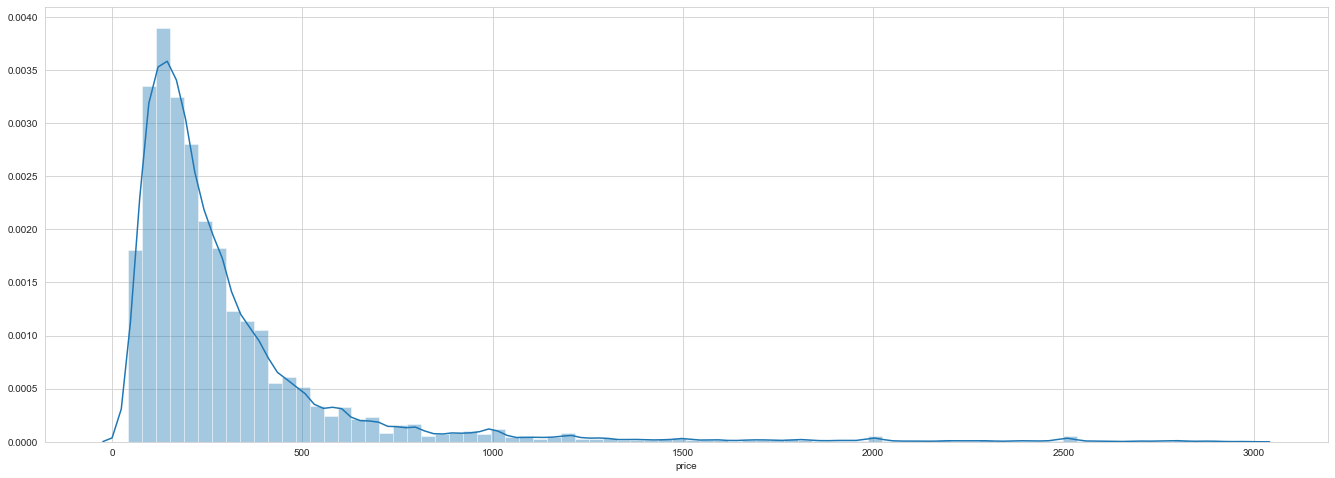

In [52]:
#The distributon of price
sns.distplot(df_trimmed['price'],bins=80)

# Observation:
Most of the room is less than one thousand dollars. The average price is about 200 dollars.

# Explore the relationship between price and number of reviews

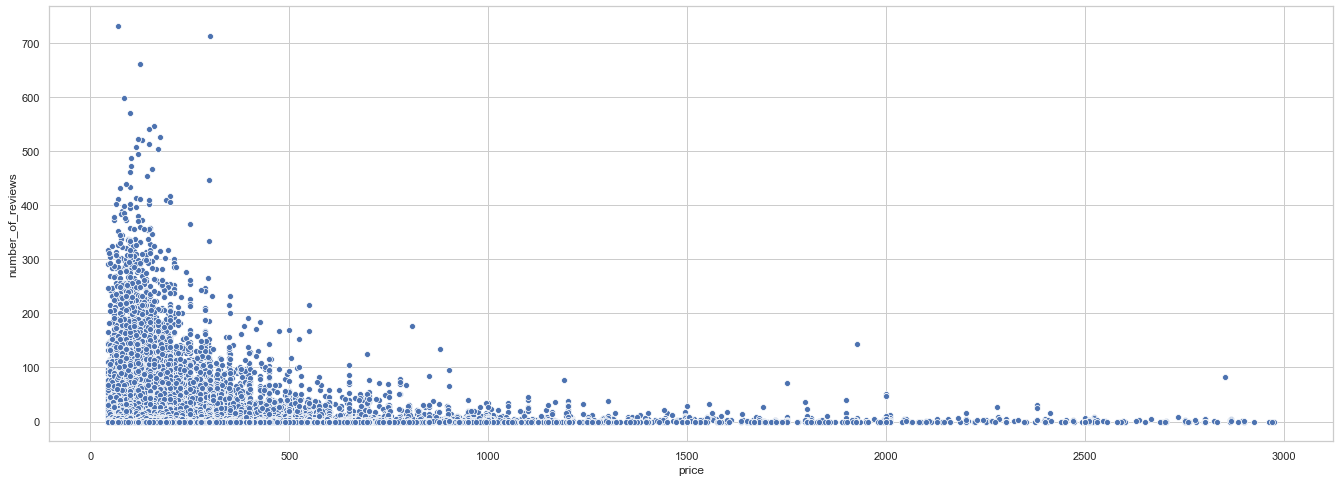

In [60]:
#The relationship between price and number of reviews
sns.scatterplot(x='price', y='number_of_reviews',data=df_trimmed)

# Observation:
The number of reviews decreases with the increase of room price. This indicates most customers prefer to stay in a less expensive room.

# Explore the room price of each neighborhood group, and the number of rooms in the market of each neighborhood, plus whether the host is super host has been taken into account.

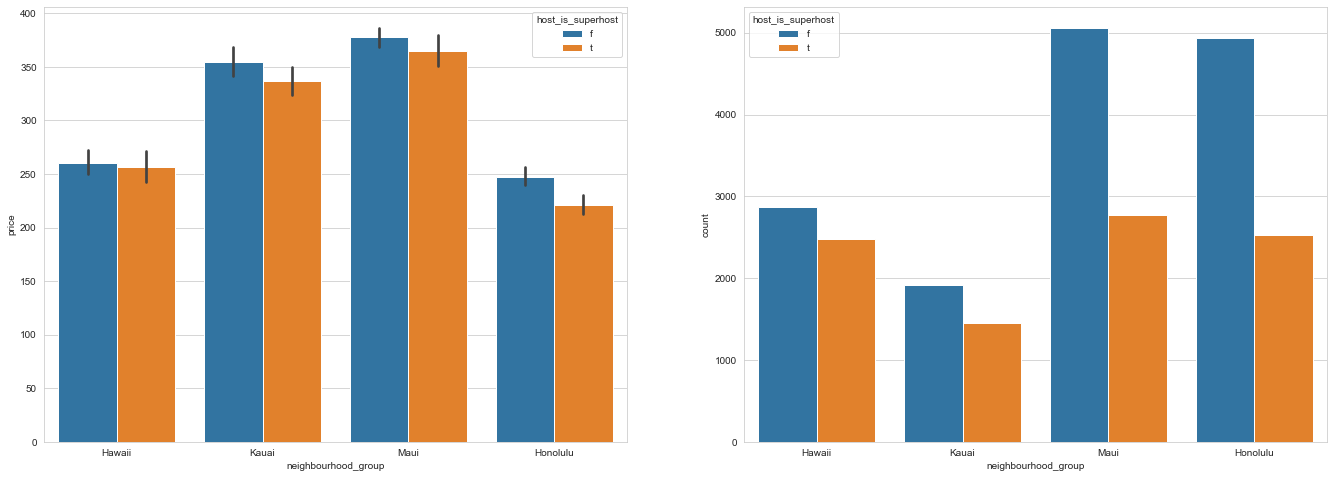

In [42]:
plt.subplot(1,2,1)
sns.barplot(x='neighbourhood_group',y='price',data=df_trimmed,hue='host_is_superhost')
plt.subplot(1,2,2)
sns.countplot(x='neighbourhood_group',data=df_trimmed, hue='host_is_superhost')

# Observation:
The rooms in Maui and Kauai are expensive than Hawaii and Honolulu. There are more Airbnb rooms in Maui and Honolulu than Hawaii and Kauai. Super hosts rooms are less cheaper than non-super hosts' room. There are more non-super hosts in the market. 


# Explore the reason of last observation

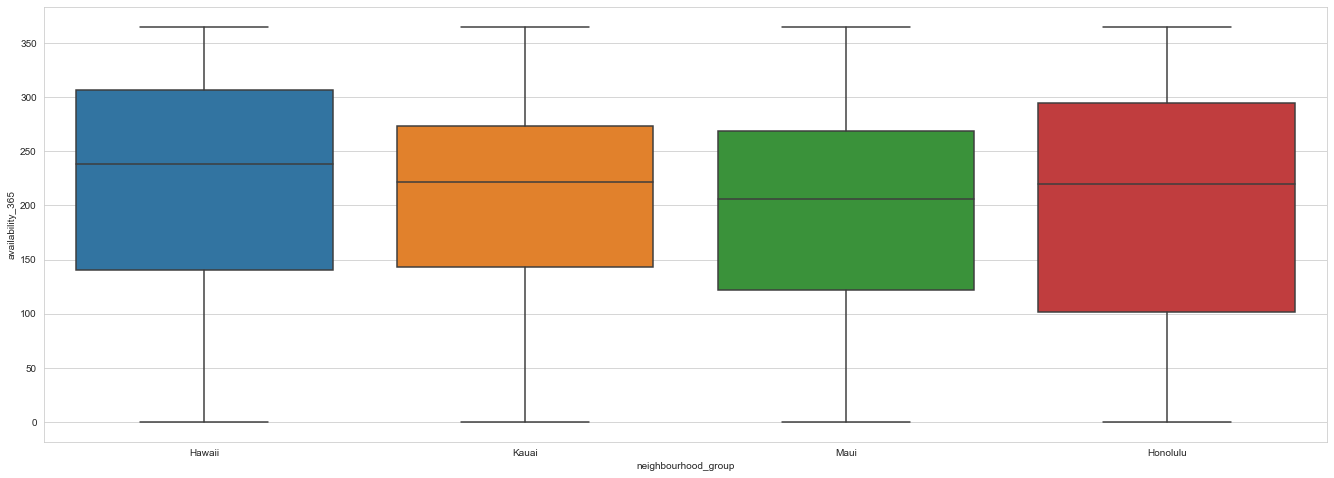

In [56]:
sns.boxplot(x='neighbourhood_group',y='availability_365',data=df_policy)

# Observation:
Rooms in Maui have the least average available in 365 days. So the reason for Airbnb rooms in Maui are expensive and more than other neighborhood groups is that Maui is the most popular island to visit. 


# Explore the relationship between room type and room price

In [45]:
df_trimmed['room_type'].value_counts()

Entire home/apt    21386
Private room        2375
Hotel room           212
Shared room           54
Name: room_type, dtype: int64

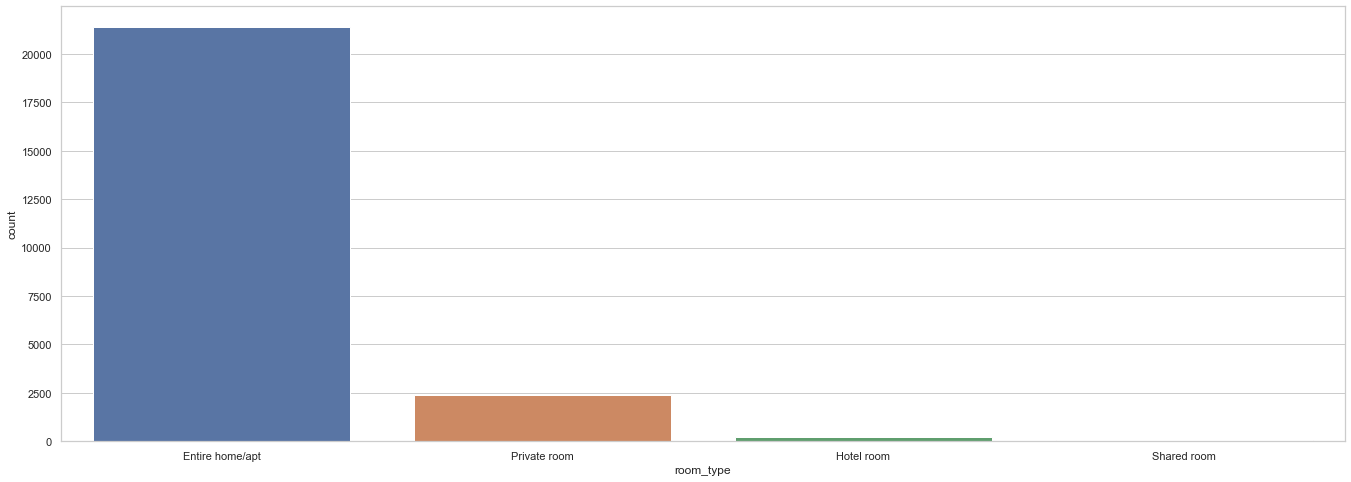

In [73]:
sns.countplot(x='room_type',data=df_trimmed)

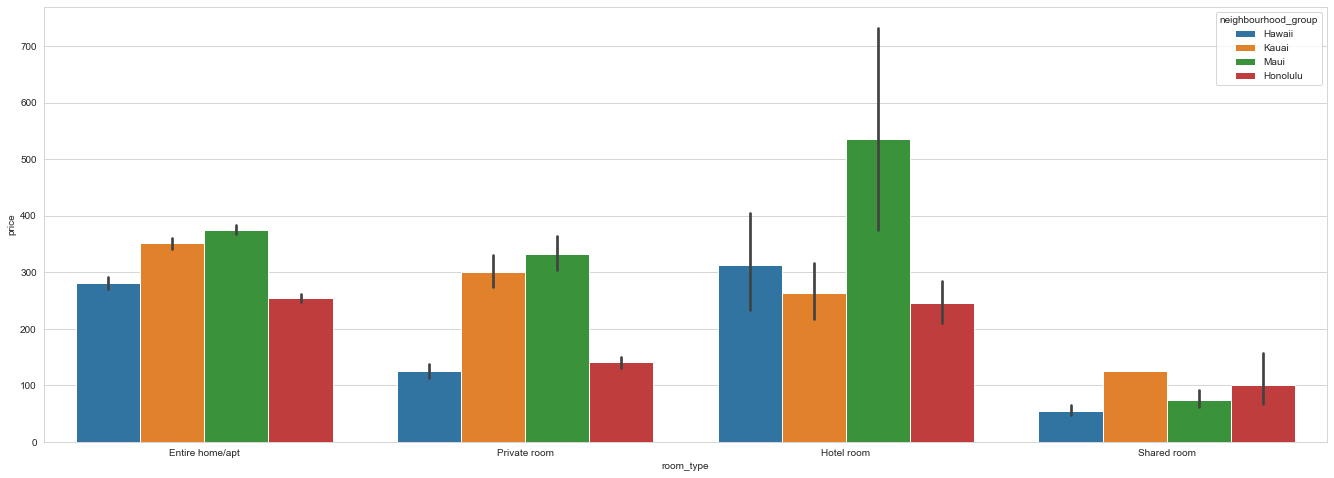

In [55]:
sns.barplot(x='room_type',y='price',data=df_trimmed,hue='neighbourhood_group')

# Observation:

Most of the Airbnb rooms in the market are entire home or apartment. Hotel room at Maui is the most expensive type.

# Explore the relationship between the number of reviews and the review score

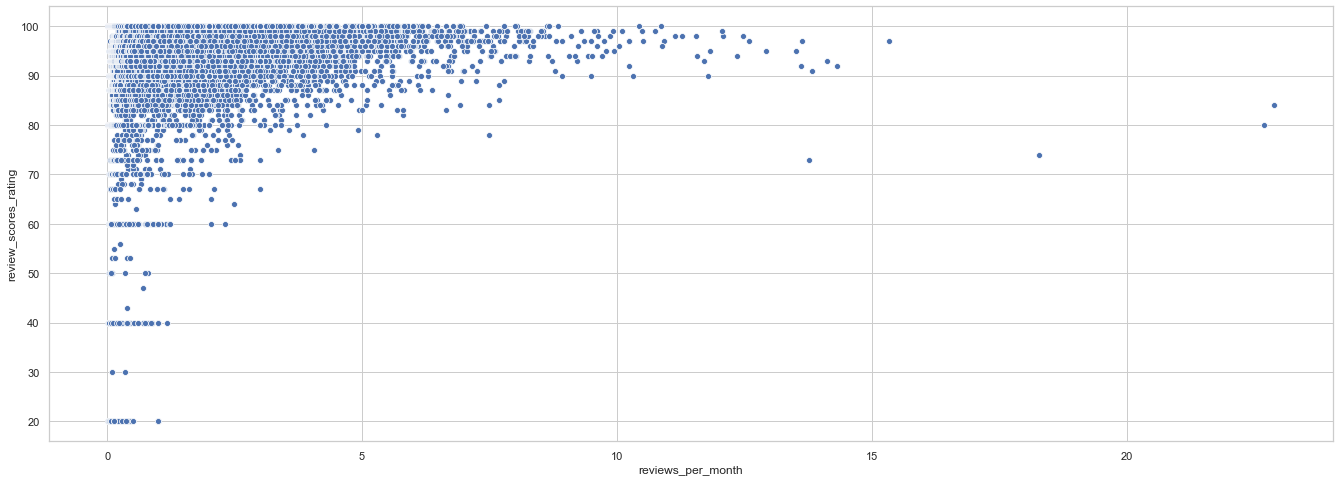

In [63]:
sns.scatterplot(x='reviews_per_month',y='review_scores_rating',data=df_trimmed)

# Observation:
There is a tendency that the more reviews the higher scores will have.

# Explore the relationship between cancellation policy and availability in 365 days

In [71]:
df_trimmed['cancellation_policy'].value_counts()

strict_14_with_grace_period    13069
super_strict_60                 4305
moderate                        2815
flexible                        1957
super_strict_30                 1824
luxury_moderate                   31
luxury_super_strict_95            20
strict                             3
luxury_no_refund                   2
luxury_super_strict_125            1
Name: cancellation_policy, dtype: int64

In [7]:
top_five_policy=df_trimmed['cancellation_policy'].value_counts().head(5)

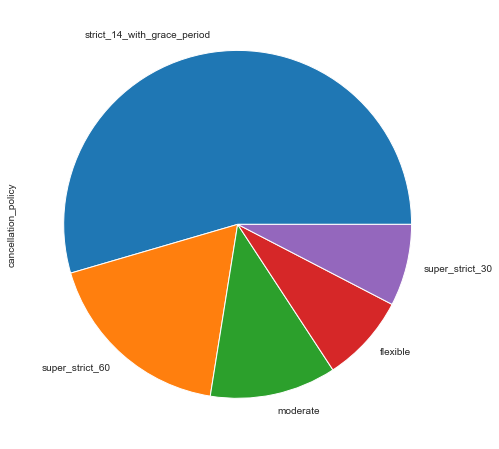

In [8]:
top_five_policy.plot(kind='pie')

In [39]:
df_policy = df_trimmed.loc[df_trimmed['cancellation_policy'].isin(['strict_14_with_grace_period','super_strict_60','moderate',
                                                       'flexible','super_strict_30'])]

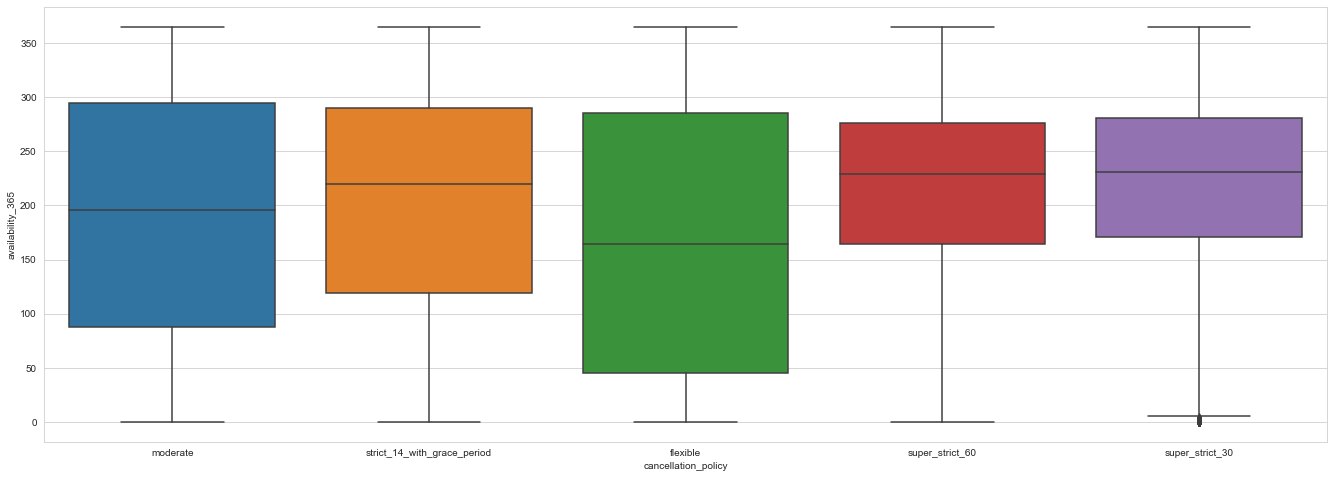

In [40]:
sns.boxplot(x='cancellation_policy',y='availability_365',data=df_policy)

# Observation:
Most of the rooms in the market's cancellation policy is 'strict_14_with_grace_period', which means for a full refund of the nightly rate, the guest must cancel within 48 hours of booking and at least 14 full days prior to listing’s local check-in time (Source: Airbnb official website). Host use the policy to protect their profit. However, according to the average availability in 365 days, we can tell that guests prefer to choose a room that has a flexible cancellation policy for their convenience.